In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
from sqlalchemy import create_engine
from config import postgres_db
engine = create_engine(postgres_db)
conn = engine.connect()

In [20]:
departments = pd.read_sql("SELECT * FROM departments", conn)
dept_emp = pd.read_sql("SELECT * FROM dept_emp", conn)
dept_manager = pd.read_sql("SELECT * FROM dept_manager", conn)
employees = pd.read_sql("SELECT * FROM employees", conn)
salaries = pd.read_sql("SELECT * FROM salaries", conn)
titles = pd.read_sql("SELECT * FROM titles", conn)

In [21]:
employee_data = pd.merge(employees, salaries, how="left", on=["emp_no", "emp_no"])
employee_data

,emp_no,emp_title_id,birth_date,first_name,last_name,sex,hire_date,salary
0,473302,s0001,1953-07-25,Hideyuki,Zallocco,M,1990-04-28,40000
1,475053,e0002,1954-11-18,Byong,Delgrande,F,1991-09-07,53422
2,57444,e0002,1958-01-30,Berry,Babb,F,1992-03-21,48973
3,421786,s0001,1957-09-28,Xiong,Verhoeff,M,1987-11-26,40000
4,282238,e0003,1952-10-28,Abdelkader,Baumann,F,1991-01-18,40000
...,...,...,...,...,...,...,...,...
300019,464231,s0001,1958-08-14,Constantino,Eastman,M,1988-10-28,69696
300020,255832,e0002,1955-05-08,Yuping,Dayang,F,1995-02-26,75355
300021,76671,s0001,1959-06-09,Ortrud,Plessier,M,1988-02-24,61886
300022,264920,s0001,1959-09-22,Percy,Samarati,F,1994-09-08,62772


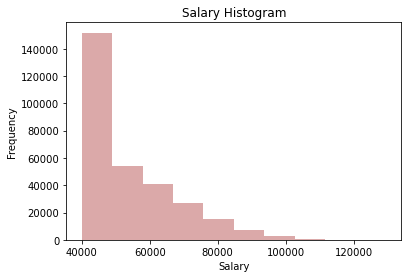

In [22]:
salary = employee_data['salary']
fig =salary.plot.hist(bins=10, alpha=0.4, color='brown').get_figure()
plt.title('Salary Histogram')
plt.ylabel('Frequency')
plt.xlabel('Salary')
plt.show()

fig.savefig('C:/Users/arc user/Desktop/sql-challenge/sql-challenge/salary-hist.png')

In [23]:
renamed_dict = {
    "title_id":"emp_title_id"
}

renamed_titles = titles.rename(columns=renamed_dict)
renamed_titles

,emp_title_id,title
0,s0001,Staff
1,s0002,Senior Staff
2,e0001,Assistant Engineer
3,e0002,Engineer
4,e0003,Senior Engineer
5,e0004,Technique Leader
6,m0001,Manager


In [24]:
employee_data_complete = pd.merge(employee_data, renamed_titles, how="left", on=["emp_title_id", "emp_title_id"])
employee_data_complete

,emp_no,emp_title_id,birth_date,first_name,last_name,sex,hire_date,salary,title
0,473302,s0001,1953-07-25,Hideyuki,Zallocco,M,1990-04-28,40000,Staff
1,475053,e0002,1954-11-18,Byong,Delgrande,F,1991-09-07,53422,Engineer
2,57444,e0002,1958-01-30,Berry,Babb,F,1992-03-21,48973,Engineer
3,421786,s0001,1957-09-28,Xiong,Verhoeff,M,1987-11-26,40000,Staff
4,282238,e0003,1952-10-28,Abdelkader,Baumann,F,1991-01-18,40000,Senior Engineer
...,...,...,...,...,...,...,...,...,...
300019,464231,s0001,1958-08-14,Constantino,Eastman,M,1988-10-28,69696,Staff
300020,255832,e0002,1955-05-08,Yuping,Dayang,F,1995-02-26,75355,Engineer
300021,76671,s0001,1959-06-09,Ortrud,Plessier,M,1988-02-24,61886,Staff
300022,264920,s0001,1959-09-22,Percy,Samarati,F,1994-09-08,62772,Staff


In [25]:
ave_salary = employee_data_complete.groupby("title").mean()["salary"]

salary_by_title = pd.DataFrame({"Average Salary": ave_salary})

salary_by_title

,Average Salary
title,
Assistant Engineer,48564.434447
Engineer,48535.336511
Manager,51531.041667
Senior Engineer,48506.799871
Senior Staff,58550.172704
Staff,58465.382850
Technique Leader,48582.896092


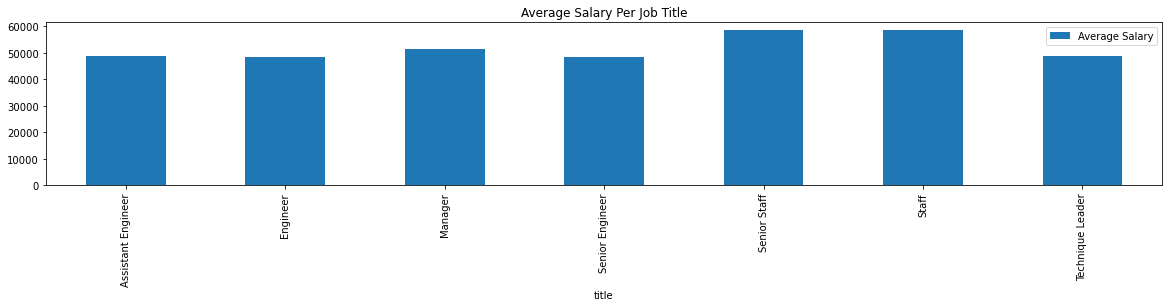

<Figure size 432x288 with 0 Axes>

In [26]:
salary_by_title.plot(kind="bar", figsize=(20,3))

plt.title("Average Salary Per Job Title")

plt.show()
plt.tight_layout()
fig.savefig('C:/Users/arc user/Desktop/sql-challenge/sql-challenge/salary_by_title.png')